In [ ]:
# Q0: Import libraries (without networkx)
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict, deque
import pandas as pd
import gdown
from google.colab import files
import random

In [ ]:
# Base Graph class for all questions
class Graph:
    def __init__(self, directed=False):
        self.adj = defaultdict(dict)
        self.directed = directed

    def add_edge(self, u, v, w=1.0):
        self.adj[u][v] = w
        if not self.directed:
            self.adj[v][u] = w

    def nodes(self):
        return list(self.adj.keys())

    def edges(self):
        e = []
        for u in self.adj:
            for v in self.adj[u]:
                if not self.directed or (self.directed and (v,u) not in e):
                    e.append((u,v))
        return e

    def neighbors(self, n):
        return list(self.adj[n].keys())

# Load network
def load_net():
    G = Graph(directed=False)  # For Q3 and Q4
    D = Graph(directed=True)   # For Q2

    with open('inf-euroroad', 'r') as f:
        next(f)
        next(f)
        for l in f:
            s, t = map(int, l.strip().split())
            G.add_edge(s, t)
            D.add_edge(s, t)

    # Add weights for Q3
    for u, v in G.edges():
        w = np.random.uniform(0.1, 1.0)
        G.adj[u][v] = w
        G.adj[v][u] = w

    return D, G

# Download dataset
url = 'https://drive.google.com/uc?id=1i3bO-YHV6cjiihXMvigIbUDE7tve-D34'
gdown.download(url, 'inf-euroroad', quiet=False)
D, G = load_net()

Downloading...
From: https://drive.google.com/uc?id=1i3bO-YHV6cjiihXMvigIbUDE7tve-D34
To: /content/inf-euroroad
100%|██████████| 11.3k/11.3k [00:00<00:00, 17.7MB/s]


Q2 Results - Directed Network Analysis:


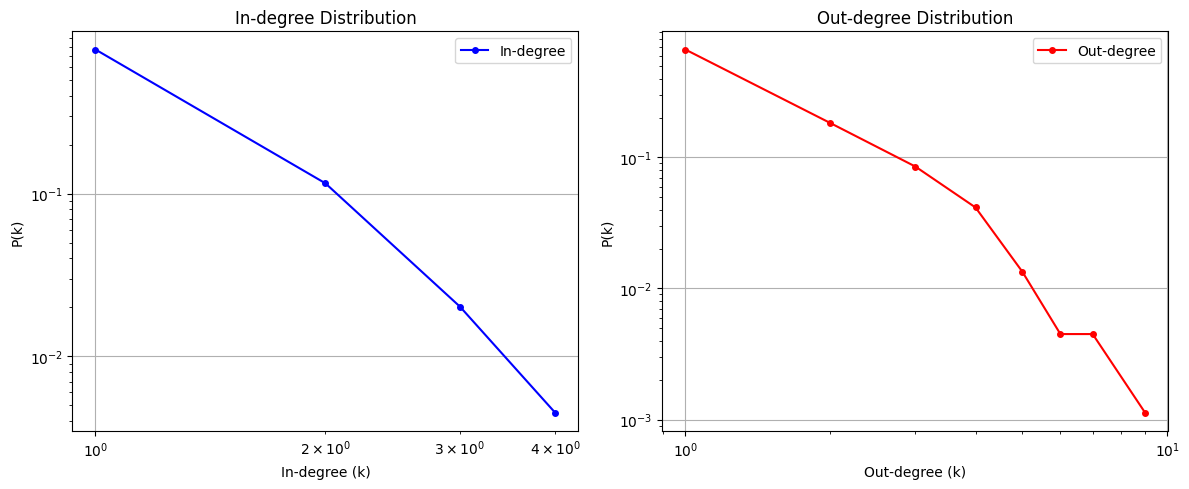

In [ ]:
# Q2: In/Out Degree Analysis for Directed Graph
def compute_degrees(D):
    """Calculate in and out degrees for directed graph"""
    i = defaultdict(int)  # in-degree
    o = defaultdict(int)  # out-degree

    for u in D.nodes():
        o[u] = len(D.adj[u])
        for v in D.nodes():
            if u in D.adj[v]:
                i[u] += 1
    return i, o

def plot_degree_distributions(D):
    """Plot in and out degree distributions"""
    i, o = compute_degrees(D)
    iv = list(i.values())
    ov = list(o.values())

    # Calculate distributions
    id = pd.Series(iv).value_counts().sort_index()
    od = pd.Series(ov).value_counts().sort_index()

    N = len(D.nodes())
    id = id / N
    od = od / N

    # Plot
    plt.figure(figsize=(12, 5))

    plt.subplot(121)
    plt.loglog(id.index, id.values, 'bo-', markersize=4, label='In-degree')
    plt.xlabel('In-degree (k)')
    plt.ylabel('P(k)')
    plt.title('In-degree Distribution')
    plt.grid(True)
    plt.legend()

    plt.subplot(122)
    plt.loglog(od.index, od.values, 'ro-', markersize=4, label='Out-degree')
    plt.xlabel('Out-degree (k)')
    plt.ylabel('P(k)')
    plt.title('Out-degree Distribution')
    plt.grid(True)
    plt.legend()

    plt.tight_layout()
    plt.savefig('directed_degrees.png')
    plt.show()

# Run Q2 analysis
print("Q2 Results - Directed Network Analysis:")
plot_degree_distributions(D)